# Q1

In [11]:
import operator

abc=input()

nuc=["A","T","C","G"]
strs=[]
for n,i in enumerate(abc):#1 mutation
    for j in nuc:
        if j!=i:
            if n!=len(abc)-1:
                strs.append(abc[:n]+j+abc[n+1:])
            else:
                strs.append(abc[:n]+j)
count1 = len(strs)
for n,i in enumerate(abc):  #2 mutations
    for n1,j in enumerate(abc):
        if n1>n:
            for k in nuc:
                for l in nuc:
                    if k!=i and l!=j:
                        if n1!=len(abc)-1:
                            strs.append(abc[:n]+k+abc[n+1:n1]+l+abc[n1+1:])
                        else:
                            strs.append(abc[:n]+k+abc[n+1:n1]+l)

count2 = len(strs) - count1
consensus=""
for i in range(0,len(abc)):
    count={"A":0,"T":0,"C":0,"G":0}
    for n,j in enumerate(strs):
        count[strs[n][i]]+=1
    consensus+=max(count.items(), key=operator.itemgetter(1))[0]
print("Consensus String:",consensus)
print("Hamming Distance: 0 because input and consensus string are the same")
print("Number of 1 Mutations:",count1)
print("Number of 2 Mutations:",count2)

ACTAGGATCA
Consensus String: ACTAGGATCA
Hamming Distance: 0 because input and consensus string are the same
Number of 1 Mutations: 30
Number of 2 Mutations: 405


${1  Mutations} =  ^{N}{C}_{1} * {4}$ <br>
${2  Mutations} =  {[N}*{(N-1)}{/2]} * {9}$

# Q2

In [5]:
import subprocess

name= "SRR494088"
bashCommand = "fastq-dump --split-3 "+name
process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
output, error = process.communicate()

Read Length: 36
Number of Reads: 974849.0


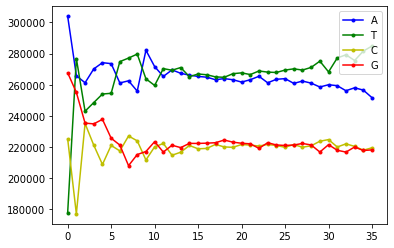

In [12]:
import matplotlib.pyplot as plt
filename="SRR390728_1.fastq"
with open(filename) as fp:
	fp=fp.read().splitlines()
	min_len=10000000
	for i in range(0,len(fp),4):#find minimum read length
		length = int(fp[i][fp[i].index("length=")+7:])
		if length<min_len:
			min_len=length
	length=min_len
	print("Read Length:",length)
	print("Number of Reads:",len(fp)/4)
	A=[]
	T=[]
	C=[]
	G=[]
	dic={}
	for i in range(0,int(length)):#count position wise frequency
		dic[i]={"A":0,"T":0,"C":0,"G":0,"N":0}
	for i in range(1,len(fp),4):
		#print(fp[i])
		for n,j in enumerate(fp[i]):
			dic[n][j]+=1
	for i in dic:
		A.append(dic[i]["A"])
		T.append(dic[i]["T"])
		C.append(dic[i]["C"])
		G.append(dic[i]["G"])
        
	plt.plot(range(len(A)),A,"b.-",label="A")
	plt.plot(range(len(T)),T,"g.-",label="T")
	plt.plot(range(len(C)),C,"y.-",label="C")
	plt.plot(range(len(G)),G,"r.-",label="G")
	plt.legend(loc="upper right")
	plt.show()

# Q3

In [13]:
import random
import operator

nuc=["A","T","C","G"]
stras=[]
strs=[]
for i in range(0,100):#generate sequences
    temp=""
    for i in range(0,1000):
        d=random.randint(0,3)
        temp+=(nuc[d])
    stras.append(temp)

motif=""
for i in range(0,10):#generate motif
    t = random.randint(0,3)
    motif+=nuc[t]


print("Motif:",motif)

for n,i in enumerate(motif):#1 mutation in motif
    for j in nuc:
        if j!=i:
            if n!=len(motif)-1:
                strs.append(motif[:n]+j+motif[n+1:])
            else:
                strs.append(motif[:n]+j)
for n,i in enumerate(motif):#2 mutations in motif  
    for n1,j in enumerate(motif):
        if n1>n:
            for k in nuc:
                for l in nuc:
                    if k!=i and l!=j:
                        if n1!=len(motif)-1:
                            strs.append(motif[:n]+k+motif[n+1:n1]+l+motif[n1+1:])
                        else:
                            strs.append(motif[:n]+k+motif[n+1:n1]+l)

motifs=strs
mod_strs=[]

for i in stras:#add motif to sequences
    pos=random.randint(0,len(i)-1)
    ra_motif = random.randint(0,len(motifs)-1)
    if pos != len(i)-1:
        mod_strs.append(i[:pos]+motifs[ra_motif]+i[pos:])
    else:
        mod_strs.append(i[:pos]+motifs[ra_motif])


d=1
change=[0 for x in range(100)]
rs = [random.randint(0, 99) for x in mod_strs]
while d==1:#gibbs sampling
    matrix=[]
    for n,i in enumerate(rs):
        matrix.append(mod_strs[n][i:i+10])
    seq_num = random.randint(0,99)
    seq = mod_strs[seq_num]
    con=""
    count_mat=[]
    pp_vals=[]
    for i in range(0,10):
        count={"A":0,"T":0,"C":0,"G":0}
        for n,k in enumerate(matrix):
            if n!=seq_num:
                count[matrix[n][i]]+=1
        count_mat.append(count)
        con+=max(count.items(), key=operator.itemgetter(1))[0]
    for n,i in enumerate(seq[:-10]):
        temp=seq[n:n+10]
        pp=1
        for n1,j in enumerate(temp):
            pp*= count_mat[n1][j]/sum(count_mat[n1].values())
        pp_vals.append(pp)
    ind=pp_vals.index(max(pp_vals))
    max_pp = max(pp_vals)
    if rs[seq_num]==ind:
        change[seq_num]=1
    else:
        rs[seq_num] = ind
    if 0 not in change:
        d=0

print("Consensus Motif",con)

Motif: TCATGGATTG
Consensus Motif ACTTTTATAT
